<div style='width=100%'><img  src=https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png width=200></div>

<div style='margin:auto;text-align: center;font-family: "Times New Roman", Times, serif; font-weight: bold;'>INTELIGENCIA ARTIFICIAL<br><br>Actividad 1 - Medición Calidad Aire Comunidad de Madrid</div>

<div style='width:100%; display:flex;flex-direction:row'>
    <div style='width:50%;margin-right:5cm;'>
        <p style='font-family: "Times New Roman", Times, serif; font-weight: bold;'>ESTUDIANTES</p>
<ul style='font-family: "Times New Roman", Times, serif;'>
    <li>Adilem Dobras 21911633</li><li>Alvaro Martinez</li></ul> </div>

</div>

 <div style='width:100%;' ><p style='font-family: "Times New Roman", Times, serif; font-weight: bold;'>Informacion destacable del trabajo:</p>
<ol style='font-family: "Times New Roman", Times, serif;'>
<li>Las V de la tabla son verificaciones</li>
<li>Los h son la cuenta de los registros en las 24 horas del dia</li>
<li>Estos registros son unicamente del año 2022 y del mes 09</li>
<li>Hemos seleccionado como puntos de interes: ozono, monoxido de nitrogeno y oxido de carbono</li></ol></div>


<p style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#EF7B7B;letter-spacing: 2px'>1. Importamos librerias</p>

In [3]:
#librerias de pandas->sirve para manipular df
import pandas as pd
#librerias mysql->sirve para manipular la base de datos
import mysql
import mysql.connector
import mysql.connector
from mysql.connector import Error

In [4]:
#librerias matplot->sirve para graficar df
import matplotlib
from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.pyplot import figure
import seaborn as sns


<p style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#EF7B7B;letter-spacing: 2px'>2. Conexión base de datos</p>

In [5]:
#creamos una conexion con la base de datos
x=1
if x==0:
    connection = mysql.connector.connect(host='127.0.0.1',
                                            user='root',
                                            password='1234', port='3308')
    cursor=connection.cursor(buffered=True)
elif x==1:
    connection = mysql.connector.connect(host='127.0.0.1',
                                         user='root',
                                         password='1234', port='3306')
cursor=connection.cursor(buffered=True)


In [6]:
#creamos la bd en donde guardaremos nuestra informacion
cursor.execute('CREATE DATABASE  if not exists control_clima;')
cursor.execute("USE control_clima;")

In [7]:
#me hago una funcion para ejecutar consultas
def query(consulta):
    cursor.execute(consulta)
    connection.commit()
    

In [8]:
#creamos la tabla municipios
query("CREATE TABLE IF NOT EXISTS Municipios (id_municipios INT NOT NULL, municipios VARCHAR (100) not null, PRIMARY KEY (id_municipios));")

In [9]:
#insertamos los municipios en la base de datos
query("INSERT INTO Municipios (id_municipios, municipios) VALUES (5,'ALCALÁ DE HENARES'),(6,'ALCOBENDAS'),(7,'ALCORCON'),(9,'ALGETE'),"
      +"(13,'ARANJUEZ'),(14,'ARGANDA DEL REY'),(16,'EL ATAZAR'),(45,'COLMENAR VIEJO'),(47,'COLLADO VILLALBA'),(49,'COSLADA'),"+
     "(58,'FUENLABRADA'),(65,'GETAFE'),(67,'GUADALIX DE LA SIERRA'),(74,'LEGANEZ'),(80,'MAJADAHONDA'),(92,'MOSTOLES'),(102,'ORUSCO DE TAJUÑA'),"
     +"(120,'PUERTO DE COTOS'),(123,'RIVAS-VACIAMADRID'),(133,'SAN MARTÍN DE VALDEIGLESIAS'),(148,'TORREJÓN DE ARDOZ'),(161,'VALDEMORO'),(171,'VILLA DEL PRADO'),(180,'VILLAREJO DE SALVANÉS');")

IntegrityError: 1062 (23000): Duplicate entry '5' for key 'municipios.PRIMARY'

In [10]:
#creamos la tabla de magnitudes
query("CREATE TABLE IF NOT EXISTS Magnitud (id_magnitud INT NOT NULL, magnitud VARCHAR (100) NOT NULL, PRIMARY KEY (id_magnitud));")

In [11]:
#insertamos los valores de las magnitudes que vamos a seleccionar
query("INSERT INTO Magnitud (id_magnitud, magnitud) VALUES (6,'Monóxido de Carbono'),(12,'Óxidos de Nitrógeno'),(14,'Ozono');")

IntegrityError: 1062 (23000): Duplicate entry '6' for key 'magnitud.PRIMARY'

In [12]:
#creamos la tabla de contenido de estudio
query('CREATE TABLE IF NOT EXISTS Datos_Climaticos (id INT NOT NULL, Municipio INT NOT NULL, Magnitud  INT NOT NULL, Ano  INT NOT NULL, Mes  INT NOT NULL, Dia  INT NOT NULL,'
    +'h01 FLOAT,h02 FLOAT,h03 FLOAT,h04 FLOAT,h05 FLOAT,h06 FLOAT,h07 FLOAT,h08 FLOAT,h09 FLOAT,h10 FLOAT,h11 FLOAT,h12 FLOAT,h13 FLOAT,'
     +'h14 FLOAT,h15 FLOAT,h16 FLOAT,h17 FLOAT,h18 FLOAT,h19 FLOAT,h20 FLOAT,h21 FLOAT,h22 FLOAT,h23 FLOAT,h24 FLOAT,PRIMARY KEY (id), FOREIGN KEY (Municipio) REFERENCES Municipios(id_municipios),FOREIGN KEY (Magnitud) REFERENCES Magnitud(id_magnitud));')


<p style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#EF7B7B;letter-spacing: 2px'>3. Limpiamos el CSV</p>

In [18]:
#Monóxido de carbono->6
#oxidos de nitrogeno->12
#ozono->14
#arreglamos el csv

#realizar un histograma de cada uno de los campos seleccionados
#hay que preguntarse cosas
#en que años ha sido peor el ozono-nitrogeno-monoxido de carbono
#en que municipios se ha mostrado que la magnitud es mas alto o mas leve
#realizar dos histogramas dentro de uno
#¿QUe paises superan el limite de ozono (grafico con municipios vs valores) grafico de barras
#aumento de ozono mes a mes
#aumento de ozono en un mes especifico->tal que cual fue el mes con mas ozono y luego graficarlo
#diagrama de distribucion de ozono vs municipios
#https://www.epdata.es/datos/cambio-climatico-datos-graficos/447 
#niveles de ozono en parte por millon por año
#recta de regresion lineal 
#mapa de coloracion segun gravedad de ozono
df = pd.read_csv('calidad_aire_datos_mes.csv',sep=';')
nombremuni=[]
for mun in df["municipio"]:
    x=str(mun)
    if (x!="nan"):
        cursor.execute("SELECT municipios FROM municipios where id_municipios="+x)
        municipios = cursor.fetchall()
        nombremuni.append(municipios[0][0])

df.drop( columns=['municipio'], axis=1, inplace=True, errors='ignore')
df.insert(loc=2, column="municipio", value=nombremuni)

fechas=[]
for i in range(len(df)):
    x=str(df.iloc[i]["dia"])+"/"+str(df.iloc[i]["mes"])+"/"+str(df.iloc[i]["ano"])

    fechas.append(x)


df.drop( columns=['dia',"mes","ano"], axis=1, inplace=True, errors='ignore')
df.insert(loc=5, column="fecha", value=fechas)
df



,provincia,estacion,municipio,magnitud,punto_muestreo,fecha,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,1,ORUSCO DE TAJUÑA,1,28102001_1_38,1/9/2022,3.0,V,3.0,V,...,2.0,V,3.0,V,2.0,V,2.0,V,2.0,V
1,28,1,ORUSCO DE TAJUÑA,6,28102001_6_48,1/9/2022,0.3,V,0.3,V,...,0.3,V,0.3,V,0.3,V,0.3,V,0.3,V
2,28,1,ORUSCO DE TAJUÑA,7,28102001_7_8,1/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,1,ORUSCO DE TAJUÑA,8,28102001_8_8,1/9/2022,7.0,V,8.0,V,...,6.0,V,7.0,V,5.0,V,5.0,V,5.0,V
4,28,1,ORUSCO DE TAJUÑA,10,28102001_10_49,1/9/2022,11.0,V,10.0,V,...,16.0,V,12.0,V,12.0,V,9.0,V,10.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,28,5,MOSTOLES,7,28092005_7_8,26/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4182,28,5,MOSTOLES,8,28092005_8_8,26/9/2022,4.0,V,4.0,V,...,23.0,V,17.0,V,12.0,V,22.0,V,16.0,V
4183,28,5,MOSTOLES,10,28092005_10_49,26/9/2022,5.0,V,7.0,V,...,9.0,V,10.0,V,12.0,V,11.0,V,11.0,V
4184,28,5,MOSTOLES,12,28092005_12_8,26/9/2022,6.0,V,6.0,V,...,25.0,V,19.0,V,14.0,V,24.0,V,18.0,V


In [19]:
#dataframe sin limpiar
df

,provincia,estacion,municipio,magnitud,punto_muestreo,fecha,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,1,ORUSCO DE TAJUÑA,1,28102001_1_38,1/9/2022,3.0,V,3.0,V,...,2.0,V,3.0,V,2.0,V,2.0,V,2.0,V
1,28,1,ORUSCO DE TAJUÑA,6,28102001_6_48,1/9/2022,0.3,V,0.3,V,...,0.3,V,0.3,V,0.3,V,0.3,V,0.3,V
2,28,1,ORUSCO DE TAJUÑA,7,28102001_7_8,1/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,1,ORUSCO DE TAJUÑA,8,28102001_8_8,1/9/2022,7.0,V,8.0,V,...,6.0,V,7.0,V,5.0,V,5.0,V,5.0,V
4,28,1,ORUSCO DE TAJUÑA,10,28102001_10_49,1/9/2022,11.0,V,10.0,V,...,16.0,V,12.0,V,12.0,V,9.0,V,10.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,28,5,MOSTOLES,7,28092005_7_8,26/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4182,28,5,MOSTOLES,8,28092005_8_8,26/9/2022,4.0,V,4.0,V,...,23.0,V,17.0,V,12.0,V,22.0,V,16.0,V
4183,28,5,MOSTOLES,10,28092005_10_49,26/9/2022,5.0,V,7.0,V,...,9.0,V,10.0,V,12.0,V,11.0,V,11.0,V
4184,28,5,MOSTOLES,12,28092005_12_8,26/9/2022,6.0,V,6.0,V,...,25.0,V,19.0,V,14.0,V,24.0,V,18.0,V


In [20]:
#eliminamos las columnas que no nos interesan
df.drop( columns=['estacion','punto_muestreo'], axis=1, inplace=True, errors='ignore')

In [21]:
#eliminas las columnas que tengan las verificaciones
df = df.drop(df.filter(regex='v').columns, axis=1,errors='ignore')

In [22]:
#selecciono los elementos que contienen las magnitudes 6, 12 y 14 con los que voy a trabajar
x=df[(df['magnitud'] == 12)|(df['magnitud'] == 6)|(df['magnitud'] == 14)]

x

,municipio,magnitud,fecha,h01,h02,h03,h04,h05,h06,h07,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1,ORUSCO DE TAJUÑA,6,1/9/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
5,ORUSCO DE TAJUÑA,12,1/9/2022,9.0,10.0,10.0,9.0,8.0,8.0,8.0,...,6.0,6.0,5.0,5.0,6.0,8.0,9.0,7.0,7.0,7.0
6,ORUSCO DE TAJUÑA,14,1/9/2022,100.0,96.0,92.0,85.0,84.0,79.0,78.0,...,117.0,116.0,114.0,112.0,103.0,91.0,92.0,86.0,91.0,88.0
11,PUERTO DE COTOS,12,1/9/2022,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
12,PUERTO DE COTOS,14,1/9/2022,121.0,122.0,116.0,112.0,111.0,111.0,109.0,...,129.0,126.0,124.0,121.0,111.0,106.0,109.0,107.0,110.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,ALGETE,12,26/9/2022,4.0,4.0,4.0,5.0,6.0,7.0,8.0,...,NaN,9.0,11.0,11.0,11.0,9.0,7.0,7.0,6.0,7.0
4178,ALGETE,14,26/9/2022,77.0,79.0,80.0,78.0,78.0,77.0,73.0,...,100.0,100.0,103.0,94.0,88.0,79.0,77.0,77.0,78.0,79.0
4180,MOSTOLES,6,26/9/2022,0.5,0.5,0.5,0.5,0.5,0.5,0.6,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4184,MOSTOLES,12,26/9/2022,6.0,6.0,6.0,8.0,17.0,22.0,34.0,...,7.0,5.0,7.0,15.0,24.0,25.0,19.0,14.0,24.0,18.0


In [23]:
#ya que tengo el csv que quiero lo descargo y lo importo a sql
x.to_csv('Datos_Climaticos.csv')

In [25]:
x_horas=pd.DataFrame(data=x.iloc[:,3:])
mean_x_horas=x_horas.mean(axis=1)
media_horas_x=pd.DataFrame(data=mean_x_horas)
x.drop( df.iloc[:, 3:], axis=1, inplace=True, errors='ignore')
x['media_dia']=media_horas_x
x

c:\Users\alvar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-25-8bee32bf5857>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['media_dia']=media_horas_x


,municipio,magnitud,fecha,media_dia
1,ORUSCO DE TAJUÑA,6,1/9/2022,0.300000
5,ORUSCO DE TAJUÑA,12,1/9/2022,8.712121
6,ORUSCO DE TAJUÑA,14,1/9/2022,97.863636
11,PUERTO DE COTOS,12,1/9/2022,4.954545
12,PUERTO DE COTOS,14,1/9/2022,120.075758
...,...,...,...,...
4177,ALGETE,12,26/9/2022,5.111111
4178,ALGETE,14,26/9/2022,79.933333
4180,MOSTOLES,6,26/9/2022,0.515152
4184,MOSTOLES,12,26/9/2022,9.772727



<p style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#EF7B7B;letter-spacing: 2px'>4. Graficamos</p>

In [26]:
def dfVelas(num):
    df=x[(x['magnitud'] == num)]
    return df

In [27]:
def graphVelas(label,titulo,df):
    sns.set(rc = {'figure.figsize':(10,5)})
    plt = sns.barplot(x = df['municipio'], y = df['media_dia'])
    plt.set(xlabel = "Municipios", ylabel = label,title=titulo)
    sns.set(font_scale=10)

In [28]:
def maximoIndice(df):
    maximo_indice_=df['media_dia'].index.max()
    print(df.loc[[maximo_indice_]])
    return maximo_indice_

In [29]:
def exponencial(maximo_indice_,titulo):
    columnas_horas=df.iloc[:, 5:]
    horas=columnas_horas.loc[[maximo_indice_]].transpose()
    horas.columns = ['Medicion']
    horas
    sns.set(rc = {'figure.figsize':(10,5)})
    horas.plot(color='r')
    title('Registro 24 horas del municipio que obtuvo mayor '+titulo)
    xlabel('Horas')
    ylabel('Medicion')

<h3 style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#7BAEEF;letter-spacing: 2px;'>DIAGRAMAS OZONO</h3>


In [30]:
#saco la tabla de solo emiciones de ozono
ozono=dfVelas(14)
ozono

,municipio,magnitud,fecha,media_dia
6,ORUSCO DE TAJUÑA,14,1/9/2022,97.863636
12,PUERTO DE COTOS,14,1/9/2022,120.075758
17,RIVAS-VACIAMADRID,14,1/9/2022,51.636364
22,ARANJUEZ,14,1/9/2022,81.227273
27,SAN MARTÍN DE VALDEIGLESIAS,14,1/9/2022,100.606061
...,...,...,...,...
4162,ALCORCON,14,26/9/2022,68.045455
4168,LEGANEZ,14,26/9/2022,70.363636
4173,MAJADAHONDA,14,26/9/2022,80.712121
4178,ALGETE,14,26/9/2022,79.933333


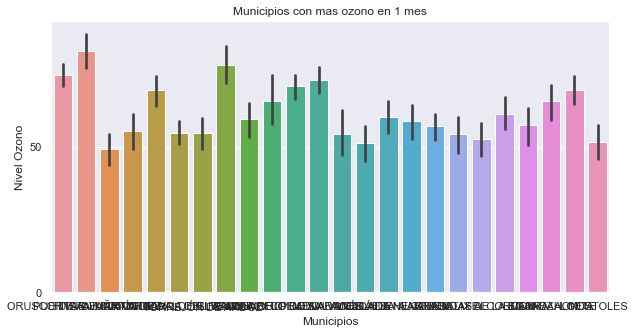

In [31]:
#Que municipio tiene mas ozono en 1 mes
graphVelas('Nivel Ozono','Municipios con mas ozono en 1 mes',ozono)


In [32]:
#buscamos el municipio que tuvo la media mas alta
maximo_indice_ozono=maximoIndice(ozono)
maximo_indice_ozono

     municipio  magnitud      fecha  media_dia
4185  MOSTOLES        14  26/9/2022  65.333333


4185

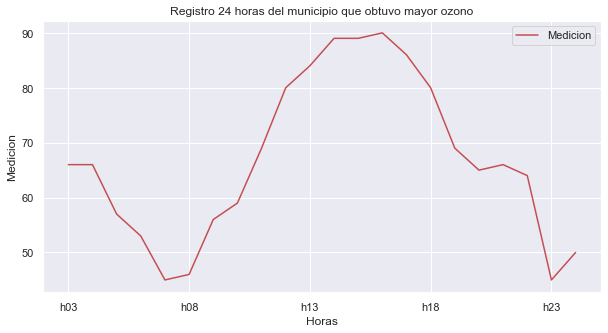

In [33]:
#vemos como fue el dia 
exponencial(maximo_indice_ozono,'ozono')

<h3 style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#7BAEEF;letter-spacing: 2px;'>MONÓXIDO DE CARBONO</h3>

In [34]:
#Monóxido de carbono->6
monoxido=dfVelas(6)
monoxido

,municipio,magnitud,fecha,media_dia
1,ORUSCO DE TAJUÑA,6,1/9/2022,0.300000
41,EL ATAZAR,6,1/9/2022,0.500000
59,VILLA DEL PRADO,6,1/9/2022,0.100000
71,COLMENAR VIEJO,6,1/9/2022,0.633333
95,ALCALÁ DE HENARES,6,1/9/2022,0.698333
...,...,...,...,...
4066,EL ATAZAR,6,26/9/2022,0.400000
4084,VILLA DEL PRADO,6,26/9/2022,0.200000
4096,COLMENAR VIEJO,6,26/9/2022,0.548333
4120,ALCALÁ DE HENARES,6,26/9/2022,0.601515


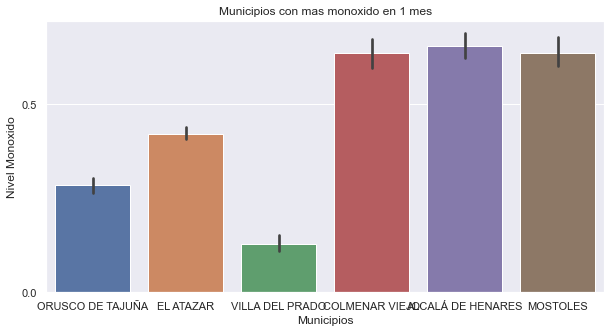

In [35]:
#Que municipio tiene mas monoxido en 1 mes-> Es interesante que solo se registro en estos municipios
graphVelas('Nivel Monoxido','Municipios con mas monoxido en 1 mes',monoxido)

In [36]:
#buscamos el municipio que tuvo la media mas alta->esta raro
maximo_indice_monoxido=maximoIndice(monoxido)
maximo_indice_monoxido

     municipio  magnitud      fecha  media_dia
4180  MOSTOLES         6  26/9/2022   0.515152


4180

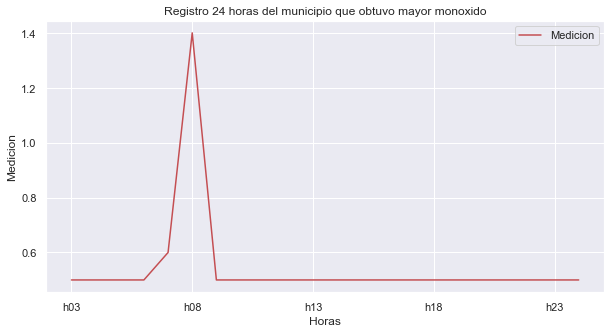

In [37]:
#vemos como fue el dia 
exponencial(maximo_indice_monoxido,'monoxido')

<h3 style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#7BAEEF;letter-spacing: 2px;'>OXIDOS DE NITROGENO</h3>

In [38]:
#saco la tabla de solo emiciones de ozono
oxido=dfVelas(12)
oxido

,municipio,magnitud,fecha,media_dia
5,ORUSCO DE TAJUÑA,12,1/9/2022,8.712121
11,PUERTO DE COTOS,12,1/9/2022,4.954545
16,RIVAS-VACIAMADRID,12,1/9/2022,30.954545
21,ARANJUEZ,12,1/9/2022,10.681818
26,SAN MARTÍN DE VALDEIGLESIAS,12,1/9/2022,4.181818
...,...,...,...,...
4161,ALCORCON,12,26/9/2022,11.712121
4167,LEGANEZ,12,26/9/2022,14.212121
4172,MAJADAHONDA,12,26/9/2022,7.818182
4177,ALGETE,12,26/9/2022,5.111111


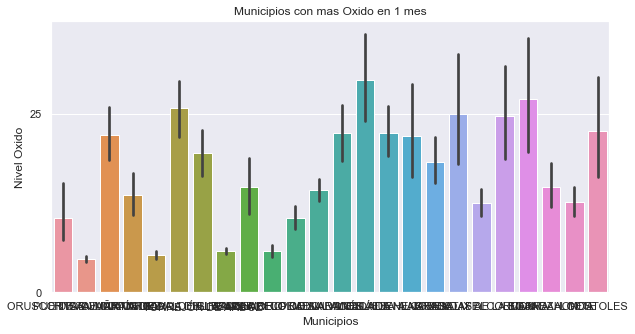

In [39]:
graphVelas('Nivel Oxido','Municipios con mas Oxido en 1 mes',oxido)


In [40]:
#buscamos el municipio que tuvo la media mas alta
maximo_indice_oxido=maximoIndice(oxido)
maximo_indice_oxido

     municipio  magnitud      fecha  media_dia
4184  MOSTOLES        12  26/9/2022   9.772727


4184

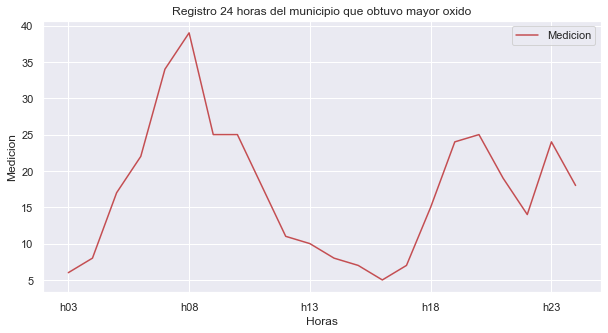

In [41]:
exponencial(maximo_indice_oxido,'oxido')

<h3 style='font-family: "Times New Roman", Times, serif; font-weight: bold;color:#7BAEEF;letter-spacing: 2px;'>DIAGRAMAS MEZCLADOS</h3>

Text(0, 0.5, 'Emisiones')

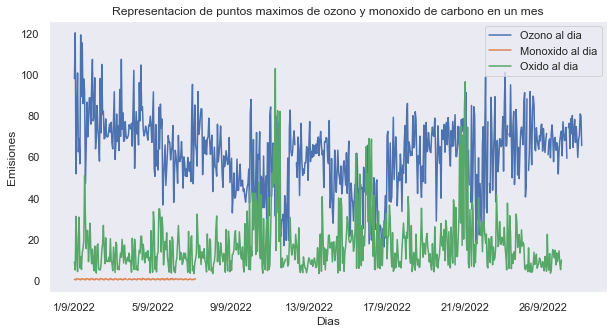

In [50]:
ax = ozono.plot(x='fecha', y='media_dia',label='Ozono al dia')
sns.set(rc={'figure.figsize':(5,5)})
ax1=monoxido.plot(ax=ax, x='fecha', y='media_dia',label='Monoxido al dia')
ax2=oxido.plot(ax=ax1, x='fecha', y='media_dia',label='Oxido al dia')
grid()

title('Representacion de puntos maximos de ozono y monoxido de carbono en un mes')
xlabel('Dias')
ylabel('Emisiones')


True


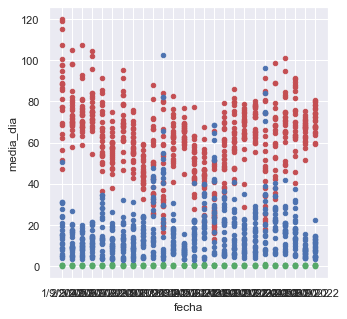

In [51]:
ax1 = ozono.plot(kind='scatter', x='fecha', y='media_dia', color='r')    
ax2 = monoxido.plot(kind='scatter', x='fecha', y='media_dia', color='g', ax=ax1)    
ax3 = oxido.plot(kind='scatter', x='fecha', y='media_dia', color='b', ax=ax2)   

print(ax1 == ax2==ax3)  # True

In [44]:
#otra forma de hacerlo
#fig, ax2 = plt.subplots()
#x.groupby('magnitud').plot(x='dia', y='media_dia', ax=ax2,legend=False)

In [45]:
#Grafico del dia que hubieron mas emisiones de ozono
#¿En que dia del mes se ha visto una media mas alta en las emiciones de ozono?
#HACE FALTA PONER TABLA DE LOS 10 MUNICIPIOS CON MAS EMISIONES POR COSA UTILIZANDO BD

import matplotlib.pyplot as plt
import numpy as np
#muestra las emisiones mas altas en el dia por municipios
valores_max=ozono.iloc[:,5:].max()
#saco la posicion de la fila con el valor maximo
i=ozono.iloc[:,5:].idxmax()
#guardo los valores maximos en un df
df_valores_max=pd.DataFrame(data=valores_max)
municipios_max=ozono['municipio'][i]
dia_max=ozono['dia'][i]
df_municipios=pd.DataFrame(data=municipios_max)
df_dia=pd.DataFrame(data=dia_max)
#le quitamos los indices que no usaremos
a=df_valores_max.reset_index(drop=True)
b=df_municipios.reset_index(drop=True)
c=df_dia.reset_index(drop=True)
#consultamos los municipios que estamos viendo
#AQUI SE DEBE REALIZAR UNA QUERY PARA QUE ME REMPLACE LOS ID_MUNICIPIOS POR LOS NOMBRES
array_nombres=[]
# Ahora podemos recorrer todos los usuarios
for m in b['municipio']:
    cursor.execute("SELECT municipios FROM municipios where id_municipios="+str(m))
    municipios = cursor.fetchall()
    array_nombres.append(municipios)

nombres=pd.DataFrame(array_nombres)
#conexion.close()
#mezclamos las columnas
b.insert(loc=1, column="dia", value=c)
b.insert(loc=2, column="maximo_valor_dia", value=a)
#elimino la columna de id de municipio 
b.drop( columns=['municipio'], axis=1, inplace=True, errors='ignore')
b.insert(loc=2, column="municipio", value=nombres)
print('MUNICIPIOS EN LOS QUE HUBO MAS EMISION EN EL MES DE SEPTIEMBRE DEL2022')
b


In [52]:
b.to_csv('emisiones_municipios.csv')

NameError: name 'b' is not defined

dia_=ozono['media_dia'].nlargest(n=10)
dia_index=dia_.index
#aqui van los 10 municipios con mas ozono
#for dia in dia_index:
    #ozono_municipio=ozono['municipio'][dia]
    #print(ozono_municipio)